# Assignment 3
Derek Devine
Trevor Webster

## 1

0.8
0.8


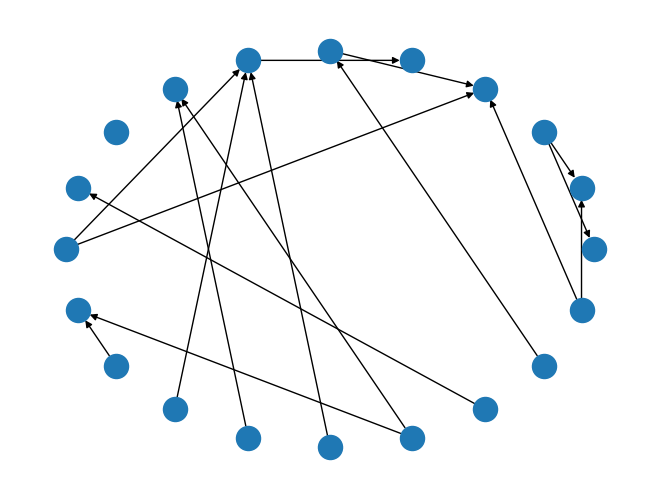

In [3]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

N = 20
rdm_graph = nx.erdos_renyi_graph(N, 0.1)
# nx.draw(rdm_graph, pos=nx.circular_layout(rdm_graph))
g = nx.DiGraph(rdm_graph)

# print(g.edges)

for e in list(g.edges):
    u, v = e
    if not v < u :
        # print(e)
        g.remove_edge(u,v)

nx.draw(g,pos=nx.circular_layout(g))


deg_in = [d for (n,d) in g.in_degree]
deg_out = [d for (n,d) in g.out_degree]

avg_deg_in =  sum(deg_in) / N
avg_deg_out = sum(deg_out) / N
degrees, counts = np.unique(sorted(deg_out), return_counts=True) 
degree_count = list(zip(degrees, counts))
avg_deg_out2 = (1/N)*sum([k*count for (k, count) in degree_count])


print(avg_deg_out)
print(avg_deg_out2)

average_degree_connectivity = sum([k*v for (k, v) in list(nx.average_degree_connectivity(g, "out").items())])

# plt.bar(expecteds)
# print(deg_in)
# print(deg_out)

## 3

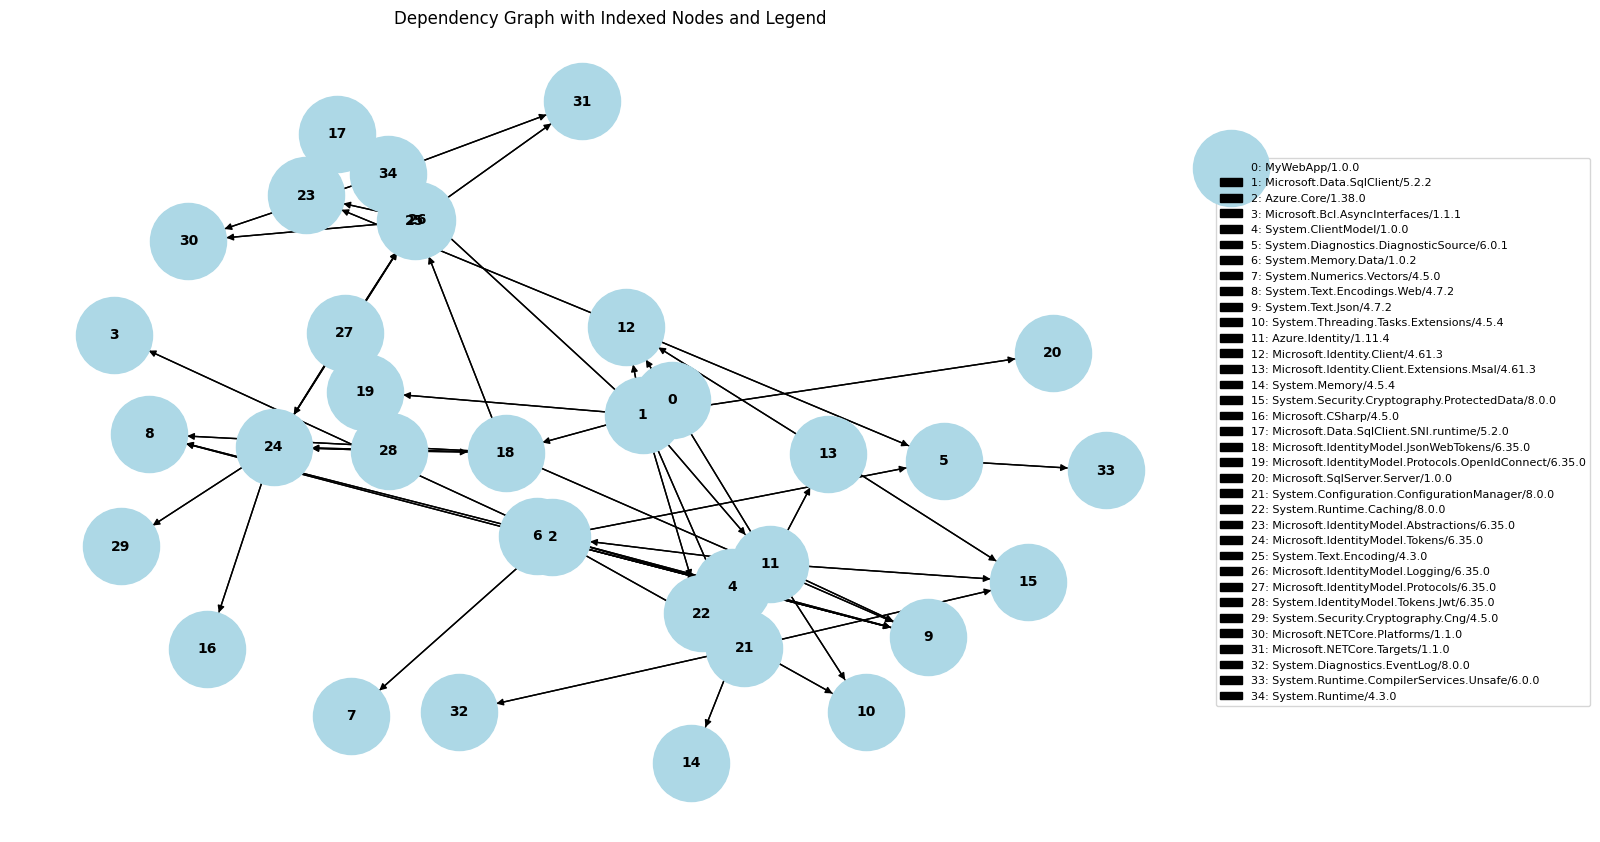

In [1]:

import json
import networkx as nx
import matplotlib.pyplot as plt

with open("deps.json", "r") as file:
    data = json.load(file)



# Extract relevant data from the JSON
targets = data.get("targets", {})
framework_data = targets.get(".NETCoreApp,Version=v8.0", {})

# Initialize the graph, labels, and edges
G = nx.DiGraph()  # Directed graph to represent dependencies
labels = {}        # Mapping of integer indices to package names
edges = []         # Store edges for adding to the graph
index = 0          # Integer node index counter

# Populate graph nodes and edges from dependencies
for package_name, package_info in framework_data.items():
    # Add the package as a node with an integer index
    if package_name not in labels.values():
        labels[index] = package_name
        package_index = index
        index += 1
    else:
        package_index = list(labels.keys())[list(labels.values()).index(package_name)]

    # Add dependencies as nodes and edges
    dependencies = package_info.get("dependencies", {})
    for dep_name, dep_version in dependencies.items():
        dep_label = f"{dep_name}/{dep_version}"

        if dep_label not in labels.values():
            labels[index] = dep_label
            dep_index = index
            index += 1
        else:
            dep_index = list(labels.keys())[list(labels.values()).index(dep_label)]

        # Add edge from package to dependency
        edges.append((package_index, dep_index))

# Add nodes and edges to the graph
G.add_edges_from(edges)

# Draw the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)  # Layout for reproducibility

# Draw the graph with integer labels
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=10, font_weight='bold')
nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=15)

sorted_labels = {k: v for k, v in sorted(labels.items(), key=lambda item: item[1]) if k != 0}
legend_labels = [f"{k}: {v}" for k, v in labels.items()]
plt.legend(legend_labels, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8)

# Display the plot
plt.title("Dependency Graph with Indexed Nodes and Legend")
plt.show()



In [31]:
def print_all_paths_from_source(G, source):
    for target in nx.descendants(G, source):  # Iterate over reachable nodes
        paths = list(nx.all_simple_paths(G, source=source, target=target))  # All paths
        for path in paths:
            print(f"Path from {source} to {target}: {path}")

# Print all paths starting from node 1
print_all_paths_from_source(G, 1)

Path from 1 to 2: [1, 11, 2]
Path from 1 to 3: [1, 11, 2, 3]
Path from 1 to 4: [1, 11, 2, 4]
Path from 1 to 5: [1, 11, 2, 5]
Path from 1 to 5: [1, 11, 12, 5]
Path from 1 to 5: [1, 11, 13, 12, 5]
Path from 1 to 5: [1, 12, 5]
Path from 1 to 6: [1, 11, 2, 4, 6]
Path from 1 to 6: [1, 11, 2, 6]
Path from 1 to 7: [1, 11, 2, 7]
Path from 1 to 8: [1, 11, 2, 4, 6, 8]
Path from 1 to 8: [1, 11, 2, 6, 8]
Path from 1 to 8: [1, 11, 2, 8]
Path from 1 to 8: [1, 18, 8]
Path from 1 to 8: [1, 19, 28, 18, 8]
Path from 1 to 9: [1, 11, 2, 4, 6, 9]
Path from 1 to 9: [1, 11, 2, 4, 9]
Path from 1 to 9: [1, 11, 2, 6, 9]
Path from 1 to 9: [1, 11, 2, 9]
Path from 1 to 9: [1, 11, 9]
Path from 1 to 9: [1, 18, 9]
Path from 1 to 9: [1, 19, 28, 18, 9]
Path from 1 to 10: [1, 11, 2, 10]
Path from 1 to 10: [1, 11, 10]
Path from 1 to 11: [1, 11]
Path from 1 to 12: [1, 11, 12]
Path from 1 to 12: [1, 11, 13, 12]
Path from 1 to 12: [1, 12]
Path from 1 to 13: [1, 11, 13]
Path from 1 to 14: [1, 11, 14]
Path from 1 to 15: [1, 1

In [42]:
import numpy as np
g = G
g.degree
nx.average_degree_connectivity(g)


{1: 0.9,
 9: 2.888888888888889,
 3: 1.7,
 4: 1.5833333333333333,
 5: 0.5,
 2: 0.4,
 8: 3.5,
 6: 1.9166666666666667}

Text(0, 0.5, '# of Nodes')

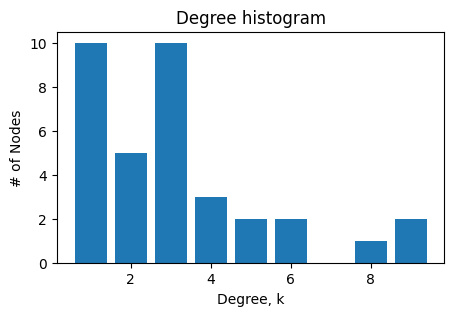

In [43]:
degree_sequence = sorted((d for n, d in g.degree()), reverse=True)

fig, ax = plt.subplots(figsize=(5,3))

ax.bar(*np.unique(degree_sequence, return_counts=True))
ax.set_title("Degree histogram")
ax.set_xlabel("Degree, k")
ax.set_ylabel("# of Nodes") # if normalized by #nodes, yaxis becomes Pr(k).

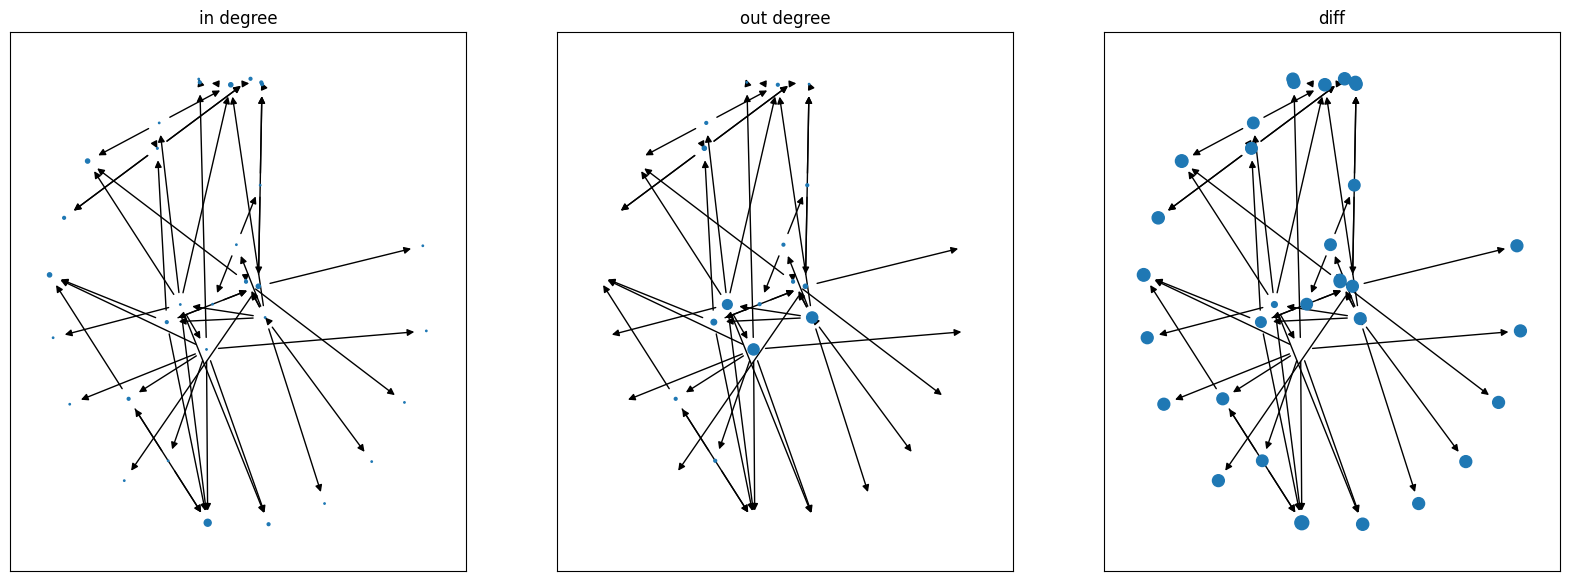

In [44]:
G2 = G
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20,7))

pos = nx.spring_layout(G2, iterations=500)

# in degree plot
node_attr_in = { 'node_size': [d[1]**2 for d in G2.in_degree()] }

nx.draw_networkx_nodes(G2, pos=pos, ax=ax1, **node_attr_in)
nx.draw_networkx_edges(G2, pos=pos, ax=ax1);
ax1.set_title("in degree")

# out degree plot
node_attr_out = { 'node_size': [d[1]**2 for d in G2.out_degree()] }

nx.draw_networkx_nodes(G2, pos=pos, ax=ax2, **node_attr_out)
nx.draw_networkx_edges(G2, pos=pos, ax=ax2);
ax2.set_title("out degree")

# diff degree plot
def get_diff_norm(G):
  deg_in = [d[1]**2 for d in G.in_degree()]
  deg_out = [d[1]**2 for d in G.out_degree()]
  diff = [i - o for (i, o) in zip(deg_in, deg_out)]

  # Step 2: Find the minimum and maximum of the differences
  min_diff = min(diff)
  max_diff = max(diff)

  # Step 3: Normalize the differences between 0 and 20
  if max_diff - min_diff != 0:  # Avoid division by zero
      normalized_diff = [(100 * (x - min_diff) / (max_diff - min_diff)) for x in diff]
  else:
      # If all differences are the same, normalize them to 10 (midpoint between 0 and 20)
      normalized_diff = [50] * len(diff)


  return normalized_diff

node_attr_diff = {'node_size': get_diff_norm(G2)}

nx.draw_networkx_nodes(G2, pos=pos, ax=ax3, **node_attr_diff)
nx.draw_networkx_edges(G2, pos=pos, ax=ax3);
ax3.set_title("diff");

0.9
0.9
13.166666666666668


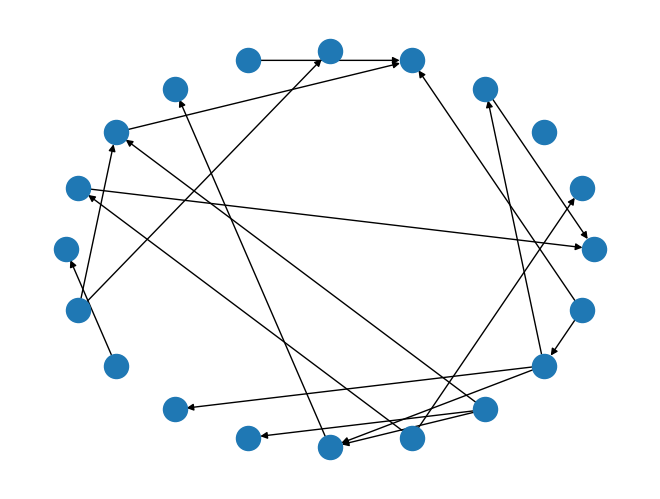

In [44]:
import numpy as np

N = 20
rdm_graph = nx.erdos_renyi_graph(N, 0.1)
# nx.draw(rdm_graph, pos=nx.circular_layout(rdm_graph))
g = nx.DiGraph(rdm_graph)

# print(g.edges)

for e in list(g.edges):
    u, v = e
    if not v < u :
        # print(e)
        g.remove_edge(u,v)

nx.draw(g,pos=nx.circular_layout(g))


deg_in = [d for (n,d) in g.in_degree]
deg_out = [d for (n,d) in g.out_degree]

avg_deg_in =  sum(deg_in) / N
avg_deg_out = sum(deg_out) / N
degrees, counts = np.unique(sorted(deg_out), return_counts=True) 
degree_count = list(zip(degrees, counts))
avg_deg_out2 = (1/N)*sum([k*count for (k, count) in degree_count])


print(avg_deg_out)
print(avg_deg_out2)

avg_deg_out3 = sum([k*v for (k, v) in list(nx.average_degree_connectivity(g, "out").items())])
print(avg_deg_out3)
# plt.bar(expecteds)
# print(deg_in)
# print(deg_out)

## 3

In [ ]:
import json
import graph_tool.all as gt
import matplotlib.pyplot as plt

# Load data from JSON file
with open("deps.json", "r") as file:
    data = json.load(file)

# Extract relevant data
targets = data.get("targets", {})
framework_data = targets.get(".NETStandard,Version=v2.0/", {})

# Initialize the graph and label property
G = gt.Graph(directed=True)
label_prop = G.new_vertex_property("string")  # To store package names as labels

# Dictionary to keep track of vertices by package name
package_vertices = {}

# Add nodes and edges from dependencies
for package_name, package_info in framework_data.items():
    # Add or get the vertex for the package
    if package_name not in package_vertices:
        package_vertex = G.add_vertex()
        package_vertices[package_name] = package_vertex
        label_prop[package_vertex] = package_name
    else:
        package_vertex = package_vertices[package_name]

    # Add dependencies as vertices and edges
    dependencies = package_info.get("dependencies", {})
    for dep_name, dep_version in dependencies.items():
        dep_label = f"{dep_name}/{dep_version}"
        
        # Add or get the vertex for the dependency
        if dep_label not in package_vertices:
            dep_vertex = G.add_vertex()
            package_vertices[dep_label] = dep_vertex
            label_prop[dep_vertex] = dep_label
        else:
            dep_vertex = package_vertices[dep_label]
        
        # Add edge from package to dependency
        G.add_edge(package_vertex, dep_vertex)

# Set labels to the graph
G.vertex_properties["label"] = label_prop

# Draw the graph
plt.figure(figsize=(12, 8))
gt.graph_draw(G, vertex_text=label_prop, vertex_font_size=10, output_size=(800, 800), output="dependency_graph.png")
plt.title("Dependency Graph")
plt.show()


In [ ]:
1